Entrar en Kaggle



In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"oscarfuentes","key":"2781c238f1c63047147243dbd0c21e97"}

   
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json


!kaggle competitions download plant-pathology-2020-fgvc7

     |████████████████████████████████| 61kB 4.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=4cdf6f282bcd8530c121250f258f7b12e315e2fdc315180649628771eab70c47
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6
 99% 768M/779M [00:12<00:00, 50.9MB/s]
100% 779M/779M [00:12<00:00, 63.9MB/s]


Unzip Files

In [2]:
!apt install unzip
!unzip /content/plant-pathology-2020-fgvc7.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Archive:  /content/plant-pathology-2020-fgvc7.zip
  inflating: images/Test_0.jpg       
  inflating: images/Test_1.jpg       
  inflating: images/Test_10.jpg      
  inflating: images/Test_100.jpg     
  inflating: images/Test_1000.jpg    
  inflating: images/Test_1001.jpg    
  inflating: images/Test_1002.jpg    
  inflating: images/Test_1003.jpg    
  inflating: images/Test_1004.jpg    
  inflating: images/Test_1005.jpg    
  inflating: images/Test_1006.jpg    
  inflating: images/Test_1007.jpg    
  inflating: images/Test_1008.jpg    
  inflating: images/Test_1009.jpg    
  inflating: images/Test_101.jpg     
  inflating: images/Test_1010.jpg    
  inflating: images/Test_1011.jpg    
  inflating: images/Test_1012.jpg    
  inflating: images/Test_1013.jpg    
  inflating: im

Inspect Files


In [3]:
import pandas as pd 

data = pd.read_csv('/content/train.csv')
print(data.columns)
labels = []
names = []
for index, row in data.iterrows():
  names.append('images/'+row[0]+'.jpg')
  if row[1]==1:
    labels.append('healthy')
  elif row[2]==1:
    labels.append('multiple_diseases')
  elif row[3]==1:
    labels.append('rust')
  elif row[4]==1:
    labels.append('scab')

DfforImageDataBunch = pd.DataFrame(list(zip(names, labels)), 
               columns =['Name', 'label'])



Index(['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


Get all from Fast Ai

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

Get Databunch

In [5]:
tfms = get_transforms(do_flip=False)
DataModel = ImageDataBunch.from_df(path='/content',df=DfforImageDataBunch,ds_tfms=tfms, size=224)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

Ver imagenes 


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

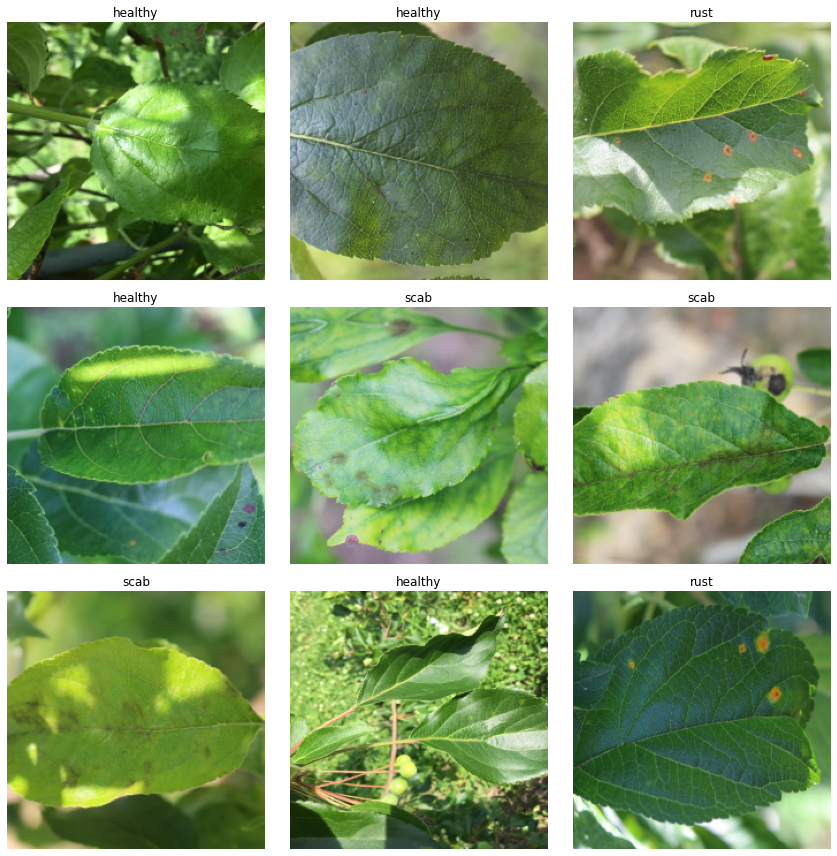

In [6]:
DataModel.show_batch(rows=3,)

Train the MODELBABY

In [7]:
learn = cnn_learner(DataModel, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.464498,0.676929,0.203297,02:12
1,1.002842,0.465840,0.131868,02:08
2,0.760179,0.367571,0.107143,02:08
3,0.613668,0.361321,0.104396,02:08


Streaming output truncated to the last 5000 lines.
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old beha

Save model

In [0]:
learn.save('stage-1')